In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# --- Set global Matplotlib parameters ---
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.dpi"] = 500
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 5.0
plt.rcParams["xtick.minor.size"] = 3.0
plt.rcParams["ytick.major.size"] = 5.0
plt.rcParams["ytick.minor.size"] = 3.0
plt.rcParams["axes.linewidth"] = 1.5
plt.rcParams["legend.handlelength"] = 2.0

In [2]:
# --- Load training data (Years 1 and 2) ---
train_df = pd.read_excel('.././datasets/training.xlsx', sheet_name='Data')

# --- Load testing data (Year 3)
test_df = pd.read_excel('.././datasets/testing.xlsx', sheet_name='Data')

# Correlation Analysis

In [3]:
train_df['Load'] = pd.to_numeric(train_df['Load'].astype(str).str.replace(',', ''), errors='coerce')

temp_columns = ['Site-1 Temp', 'Site-2 Temp', 'Site-3 Temp', 'Site-4 Temp', 'Site-5 Temp']
GHI_columns = ['Site-1 GHI', 'Site-2 GHI', 'Site-3 GHI', 'Site-4 GHI', 'Site-5 GHI']

# --- Compute correlations with Load ---
correlations = {site: train_df[site].corr(train_df['Load']) for site in temp_columns}
correlations2 = {site: train_df[site].corr(train_df['Load']) for site in GHI_columns}
for site in temp_columns:
    corr = train_df[site].corr(train_df['Load'])
    print(f"Correlation between {site} and Load: {corr:.4f}")

# --- Convert to pandas Series for easy plotting ---
correlation_series = pd.Series(correlations)
correlation_series2 = pd.Series(correlations2)


Correlation between Site-1 Temp and Load: 0.3967
Correlation between Site-2 Temp and Load: 0.3963
Correlation between Site-3 Temp and Load: 0.4007
Correlation between Site-4 Temp and Load: 0.3963
Correlation between Site-5 Temp and Load: 0.4038


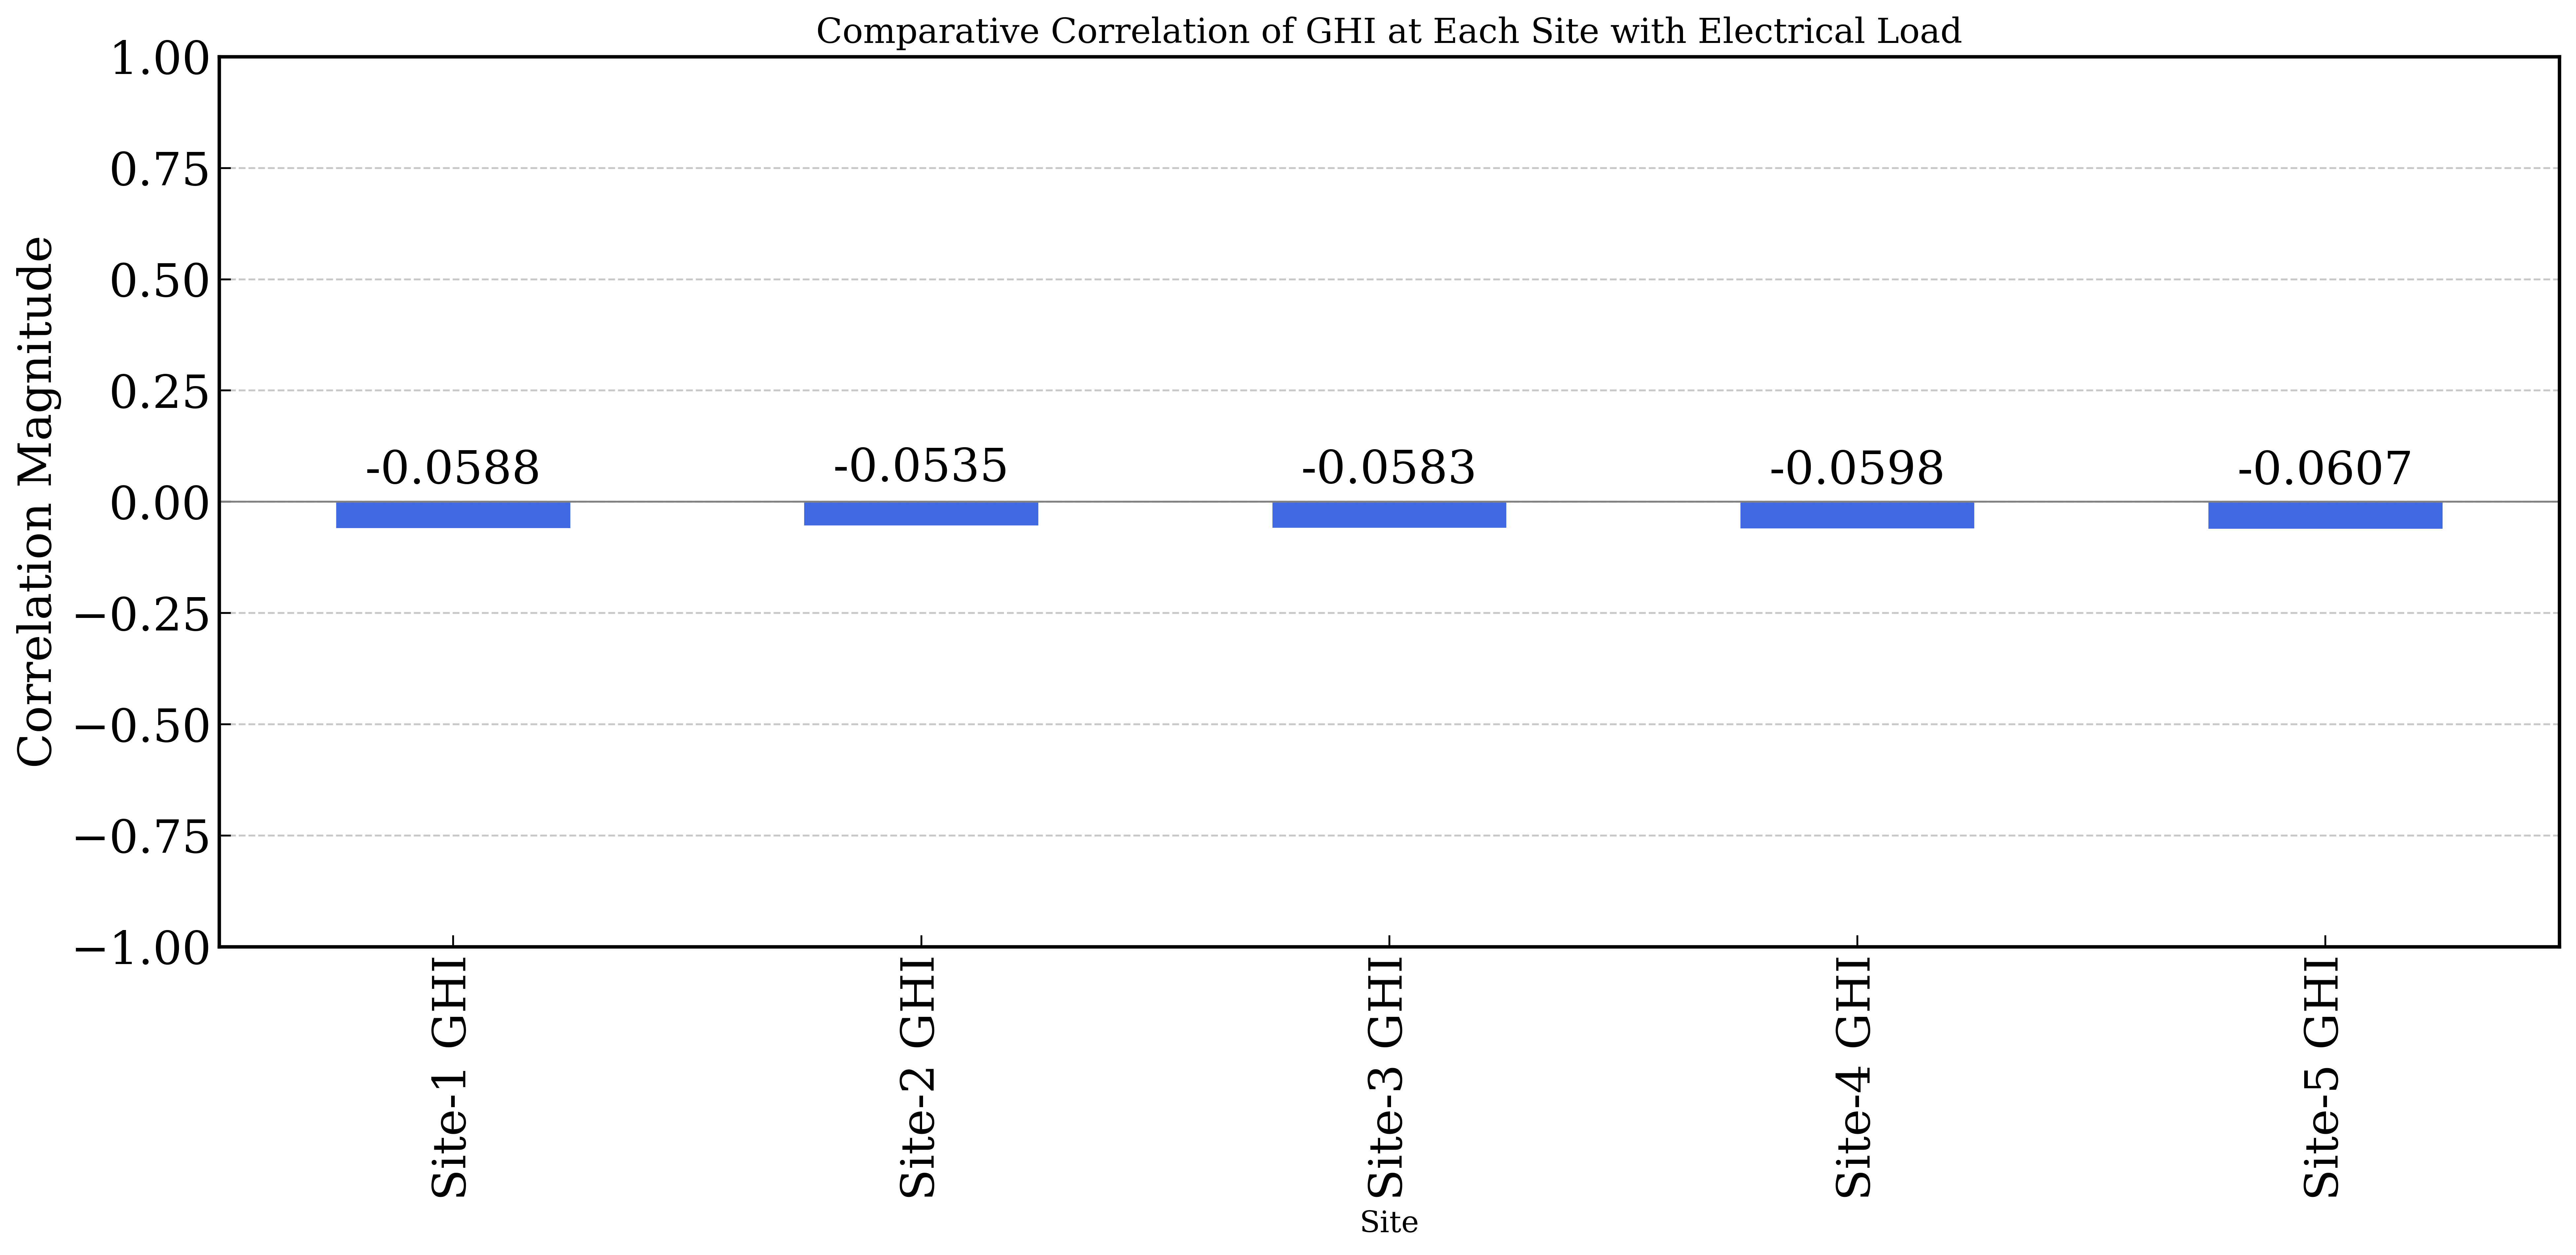

In [6]:
plt.figure(figsize=(16, 8))
correlation_series2.plot(kind='bar', color='royalblue')

# Graph Details
plt.title('Comparative Correlation of GHI at Each Site with Electrical Load', fontsize=15)
plt.xlabel('Site', fontsize=13)
plt.ylabel('Correlation Magnitude')
plt.ylim(-1, 1) # Ensuring scale reflects correlation range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(0, color='gray', linewidth=0.8)
for index, value in enumerate(correlation_series2):
    plt.text(index, value + 0.1, f'{value:.4f}', ha='center')

plt.tight_layout()
plt.show()

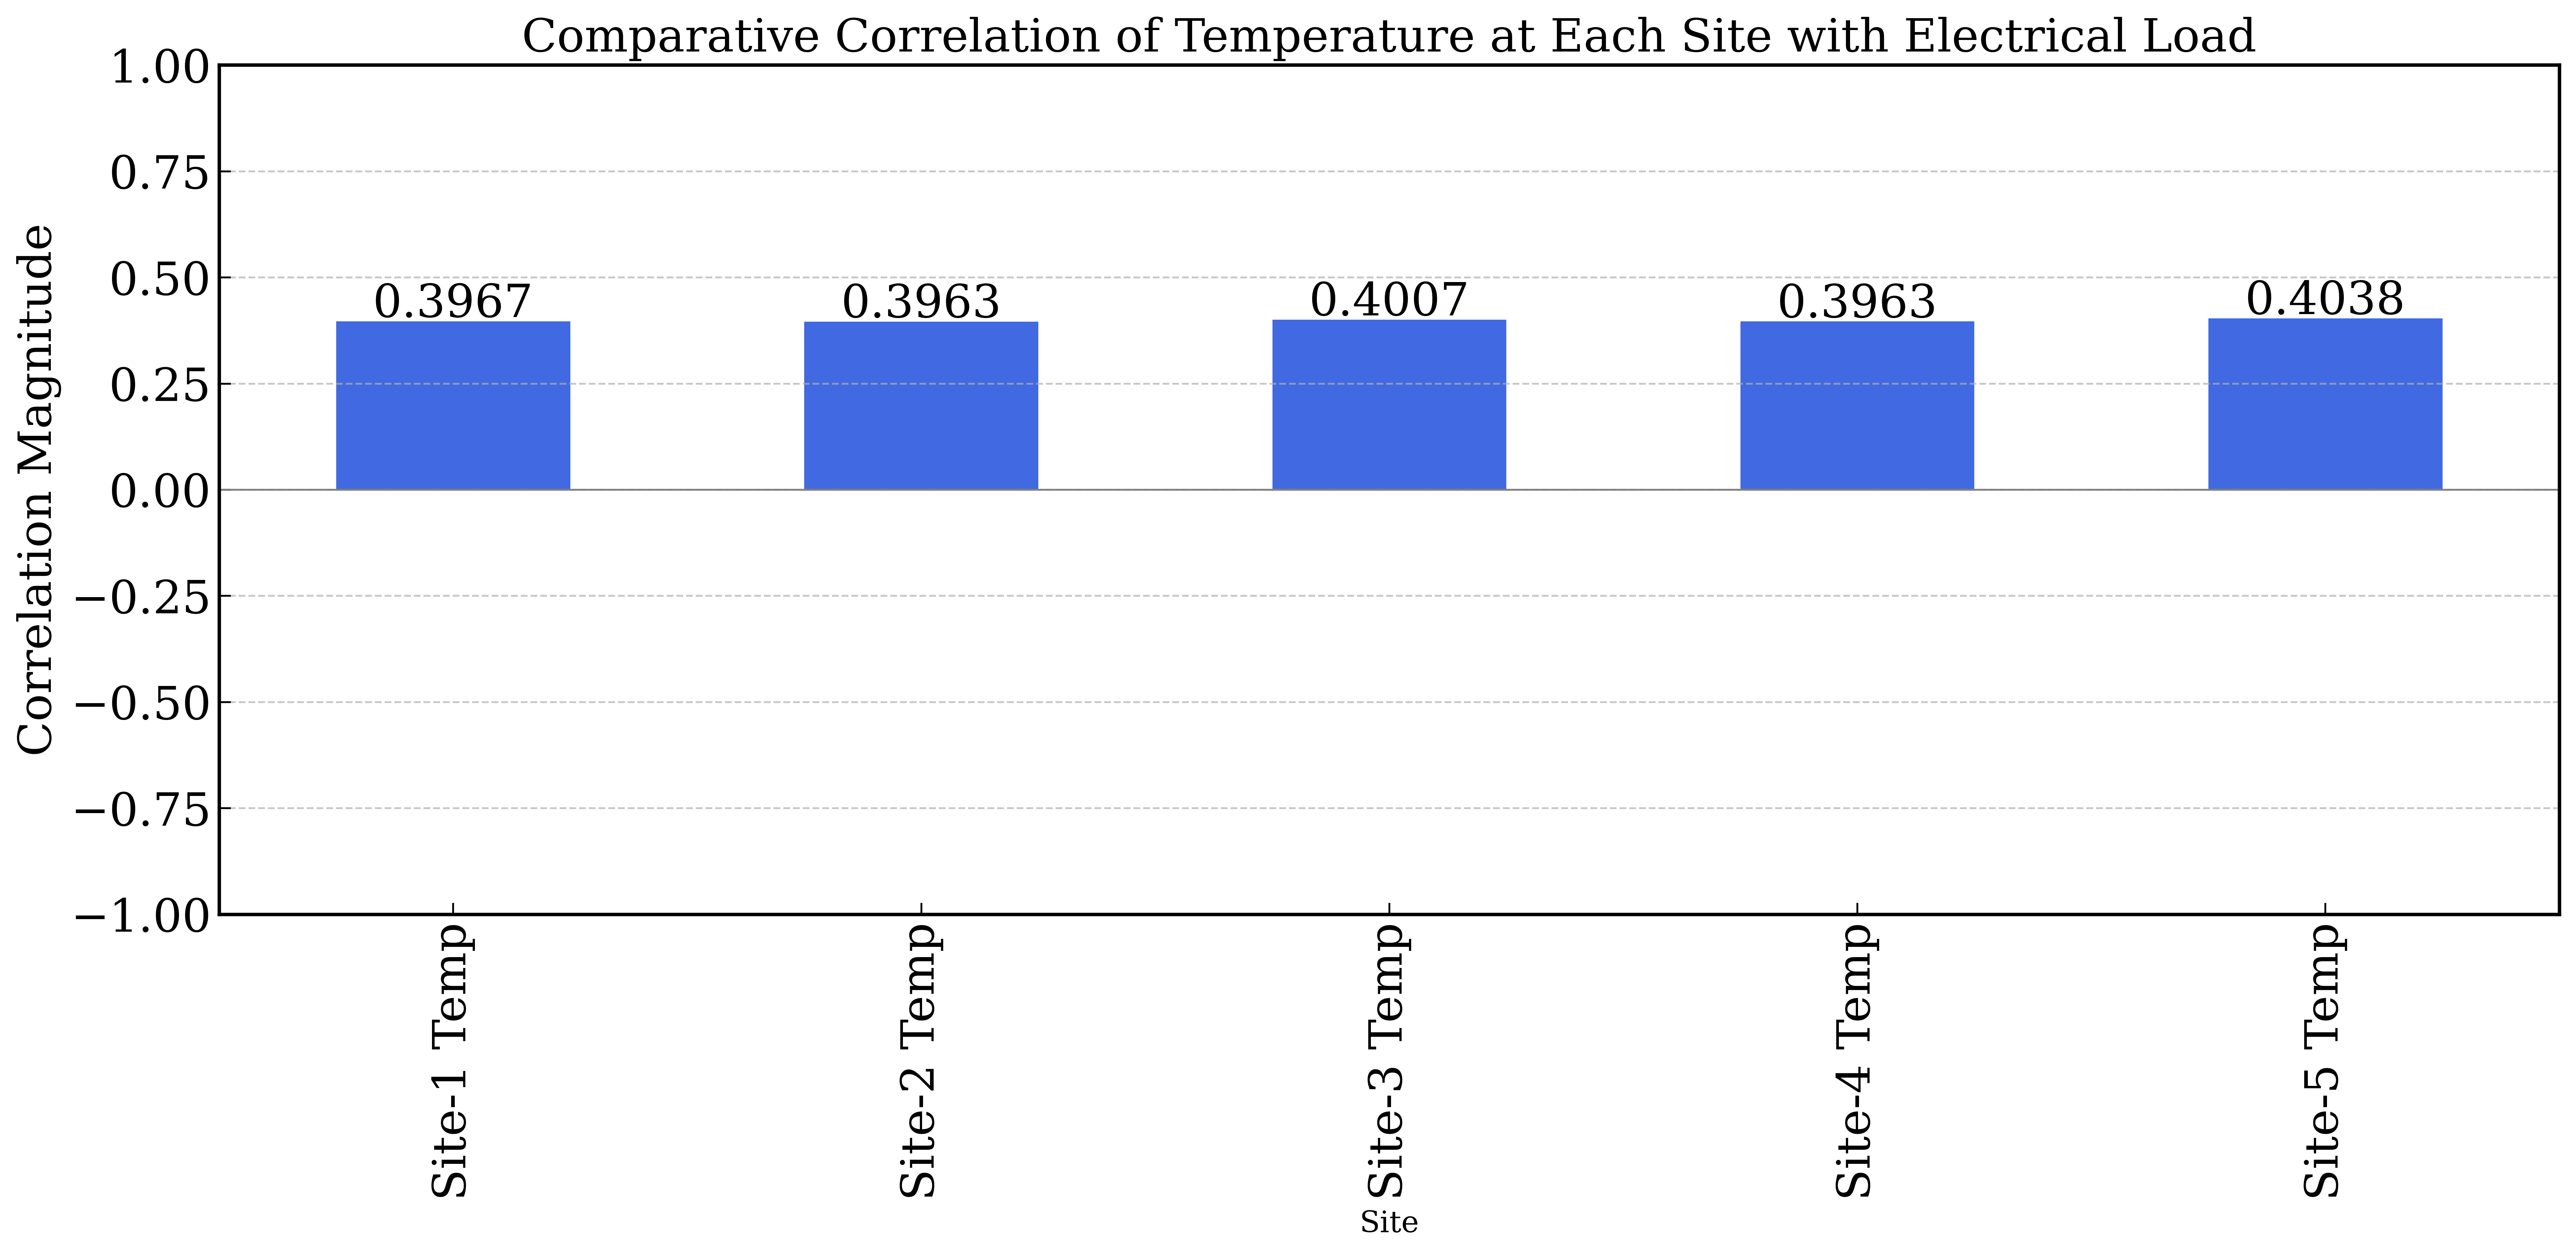

In [5]:
plt.figure(figsize=(16, 8))
correlation_series.plot(kind='bar', color='royalblue')

# Graph Details
plt.title('Comparative Correlation of Temperature at Each Site with Electrical Load')
plt.xlabel('Site', fontsize=13)
plt.ylabel('Correlation Magnitude')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(0, color='gray', linewidth=0.8)
plt.ylim(-1, 1)  # Ensuring scale reflects correlation range
for index, value in enumerate(correlation_series):
    plt.text(index, value + 0.01, f'{value:.4f}', ha='center')
plt.tight_layout()
plt.show()


# Seasonal Decomposition

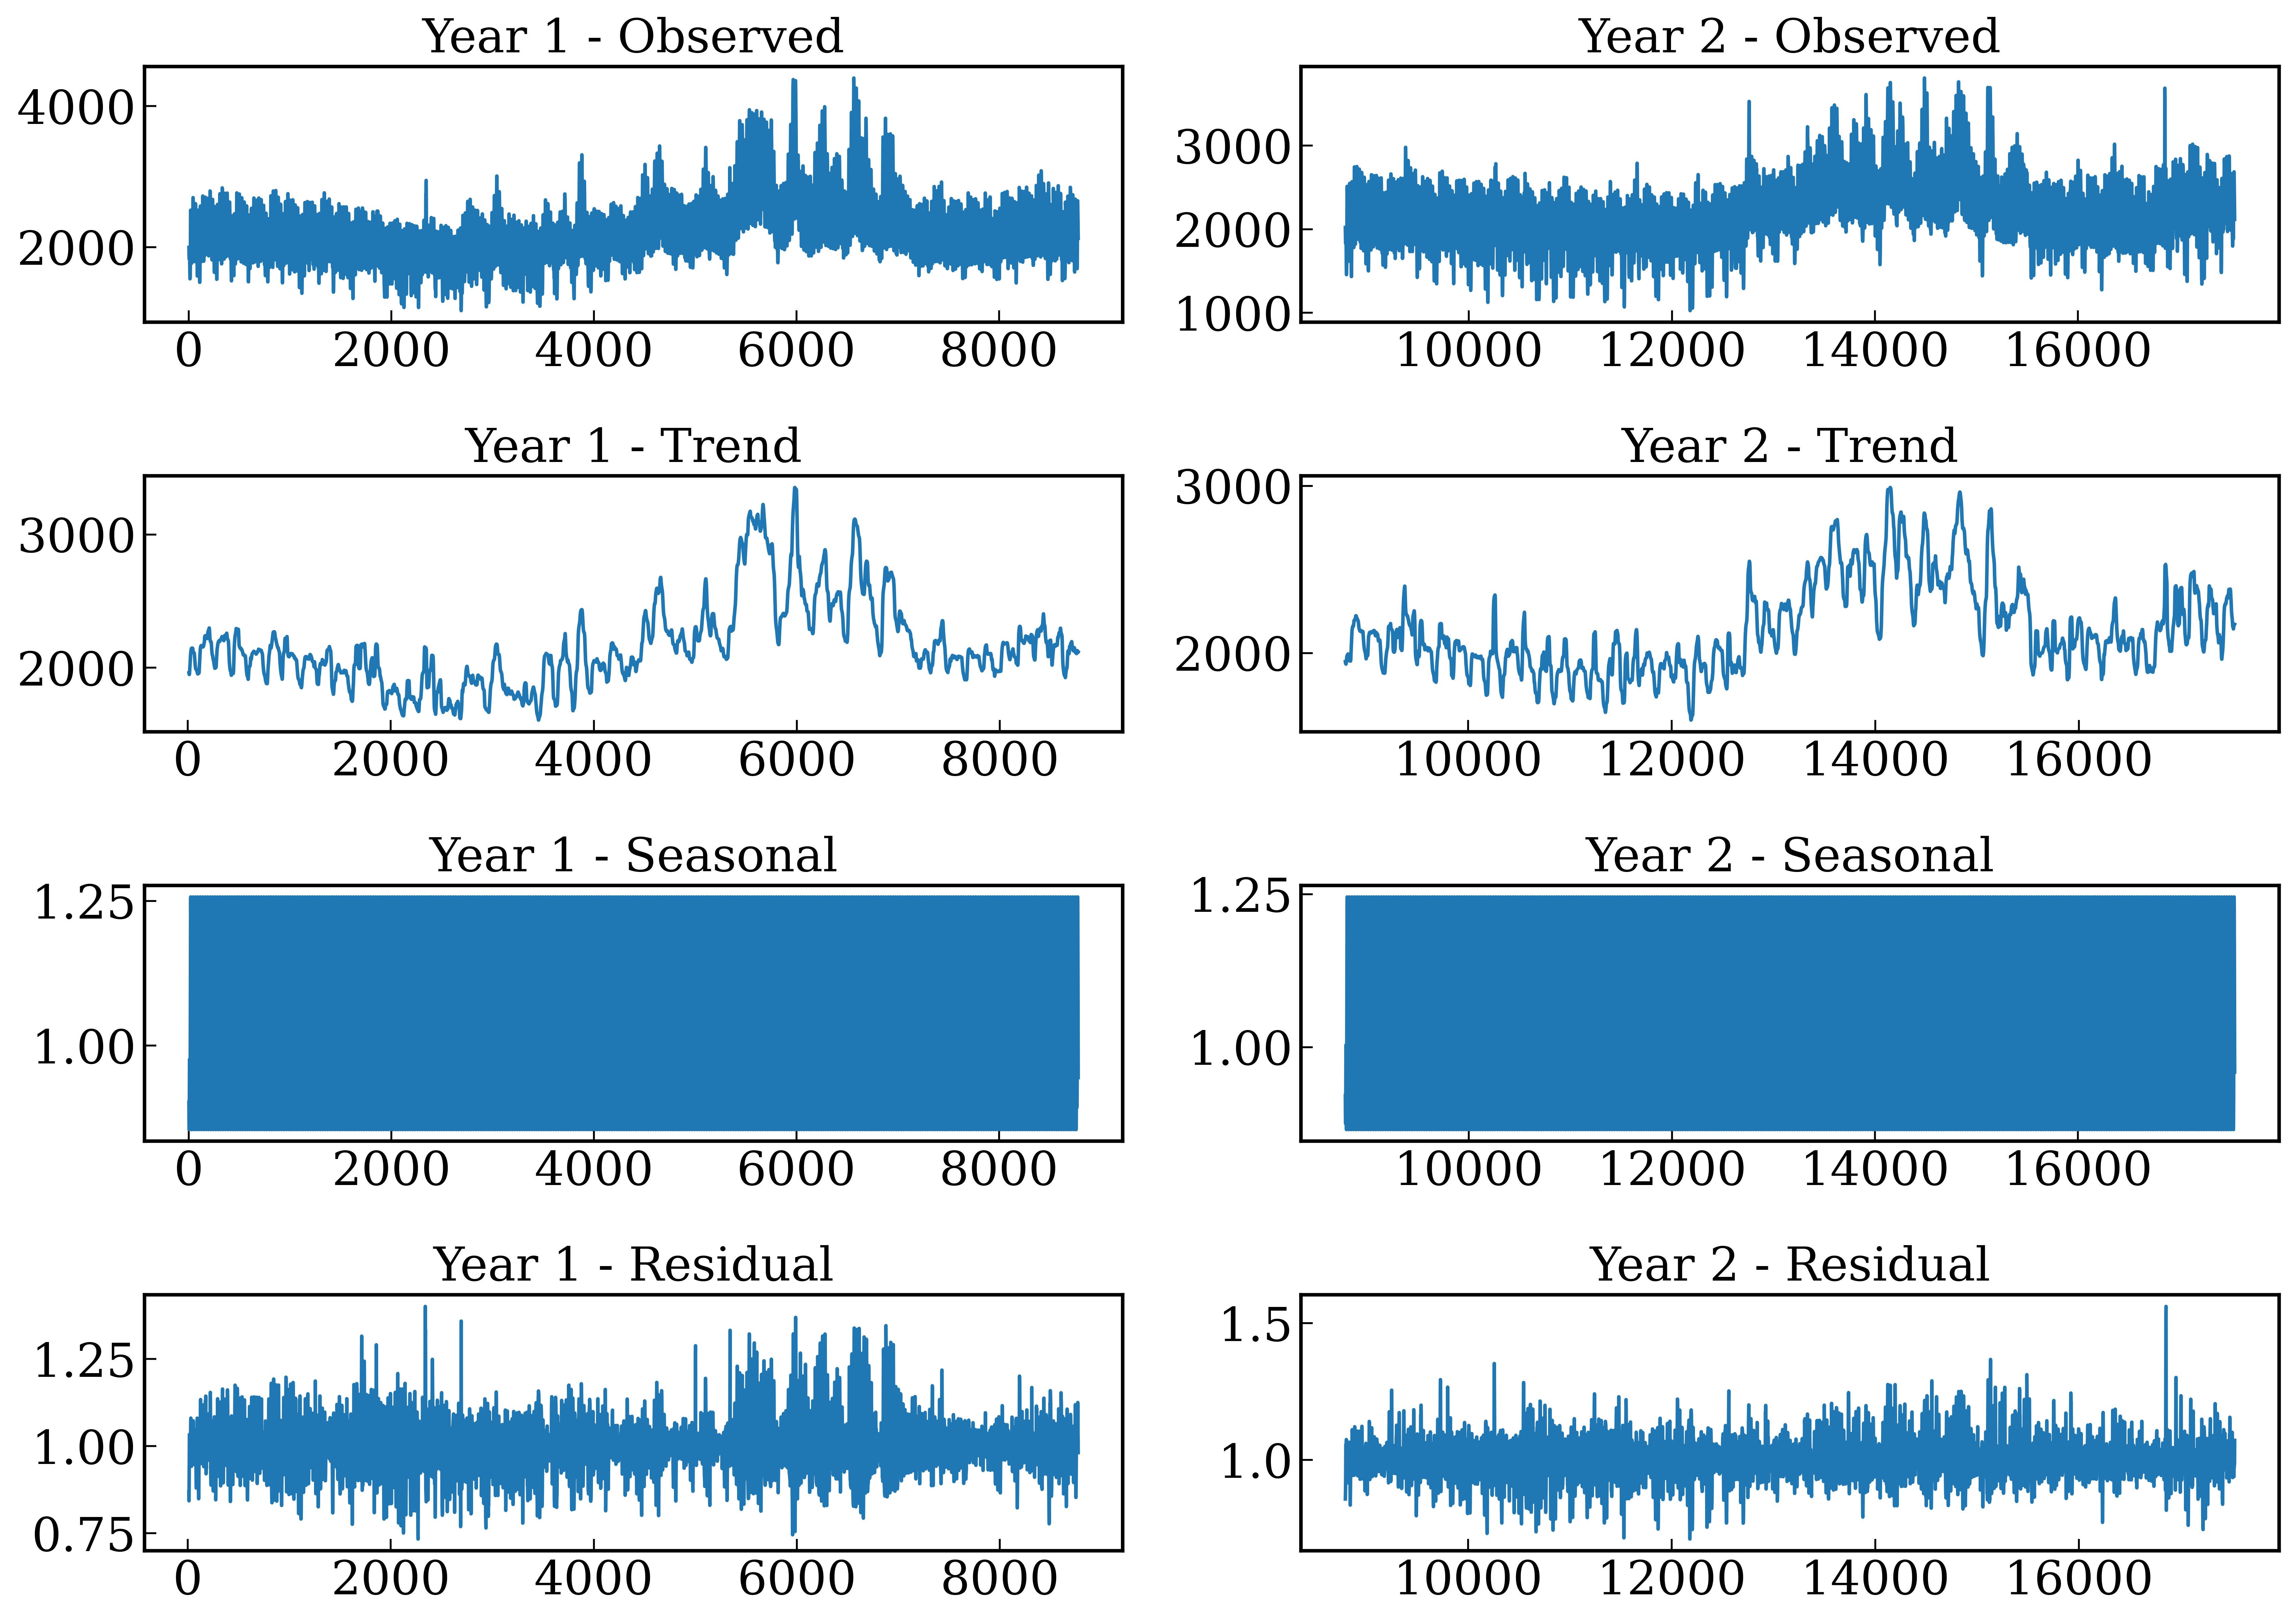

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

if 'Year' in train_df.columns:
    year1_data = train_df[train_df['Year'] == 1]
    year2_data = train_df[train_df['Year'] == 2]
else:
    n = len(train_df)
    year1_data = train_df.iloc[:n//2]
    year2_data = train_df.iloc[n//2:]

# Define the period for seasonal decomposition.
period = 24

# Perform seasonal decomposition on the "Electricity Load" series.
decomp_year1 = seasonal_decompose(year1_data['Load'], model='multiplicative', period=period)
decomp_year2 = seasonal_decompose(year2_data['Load'], model='multiplicative', period=period)

# Create a 4x2 subplot grid:
# Left column for Year 1 and right column for Year 2.
fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=False)

# Year 1 plots (left column)
axes[0, 0].plot(decomp_year1.observed)
axes[0, 0].set_title('Year 1 - Observed')
axes[1, 0].plot(decomp_year1.trend)
axes[1, 0].set_title('Year 1 - Trend')
axes[2, 0].plot(decomp_year1.seasonal)
axes[2, 0].set_title('Year 1 - Seasonal')
axes[3, 0].plot(decomp_year1.resid)
axes[3, 0].set_title('Year 1 - Residual')

# Year 2 plots (right column)
axes[0, 1].plot(decomp_year2.observed)
axes[0, 1].set_title('Year 2 - Observed')
axes[1, 1].plot(decomp_year2.trend)
axes[1, 1].set_title('Year 2 - Trend')
axes[2, 1].plot(decomp_year2.seasonal)
axes[2, 1].set_title('Year 2 - Seasonal')
axes[3, 1].plot(decomp_year2.resid)
axes[3, 1].set_title('Year 2 - Residual')

plt.tight_layout()
plt.show()